In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-pathology-2020-fgvc7/sample_submission.csv
/kaggle/input/plant-pathology-2020-fgvc7/test.csv
/kaggle/input/plant-pathology-2020-fgvc7/train.csv
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_782.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1356.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1767.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1424.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1622.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_882.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_1254.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Train_265.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1079.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1794.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_487.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1787.jpg
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_627.jpg
/kaggle/input/plant-pathology

In [2]:
import torch
from fastai.vision.all import *

In [3]:
train_df = pd.read_csv(r'../input/plant-pathology-2020-fgvc7/train.csv')

In [4]:
train_df.head(10)

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0
6,Train_6,0,1,0,0
7,Train_7,0,0,0,1
8,Train_8,0,0,0,1
9,Train_9,1,0,0,0


In [5]:
train_df.loc[(train['multiple_diseases']==1) & (train['scab']==1)]

NameError: name 'train' is not defined

In [6]:
path = Path(r'../input/plant-pathology-2020-fgvc7')
Path.BASE_PATH = path

In [7]:
(path/'images').ls()

(#3642) [Path('images/Test_782.jpg'),Path('images/Test_1356.jpg'),Path('images/Train_1767.jpg'),Path('images/Train_1424.jpg'),Path('images/Train_1622.jpg'),Path('images/Train_882.jpg'),Path('images/Train_1254.jpg'),Path('images/Train_265.jpg'),Path('images/Test_1079.jpg'),Path('images/Test_1794.jpg')...]

In [8]:
dblock = DataBlock()

In [9]:
dsets = dblock.datasets(train_df)

In [10]:
len(dsets.train), len(dsets.valid)

(1457, 364)

In [11]:
#fname = (path/'images').ls()[0]
#re.findall(r'(.*)_\d+.jpg$',fname.name)

In [12]:
x,y = dsets.train[0]
x,y

(image_id             Train_802
 healthy                      1
 multiple_diseases            0
 rust                         0
 scab                         0
 Name: 802, dtype: object,
 image_id             Train_802
 healthy                      1
 multiple_diseases            0
 rust                         0
 scab                         0
 Name: 802, dtype: object)

In [13]:
x['image_id']

'Train_802'

In [14]:
train_df['image_id'] = train_df['image_id'] + '.jpg'
train_df['image_id'].astype('str')

0          Train_0.jpg
1          Train_1.jpg
2          Train_2.jpg
3          Train_3.jpg
4          Train_4.jpg
             ...      
1816    Train_1816.jpg
1817    Train_1817.jpg
1818    Train_1818.jpg
1819    Train_1819.jpg
1820    Train_1820.jpg
Name: image_id, Length: 1821, dtype: object

In [15]:
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0.jpg,0,0,0,1
1,Train_1.jpg,0,1,0,0
2,Train_2.jpg,1,0,0,0
3,Train_3.jpg,0,0,1,0
4,Train_4.jpg,1,0,0,0


In [16]:
def reverse_one(row):
    for c in train_df.columns:
        if row[c]==1:
            return c
train_df['labels'] = train_df.apply(reverse_one, axis=1)

In [17]:
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab,labels
0,Train_0.jpg,0,0,0,1,scab
1,Train_1.jpg,0,1,0,0,multiple_diseases
2,Train_2.jpg,1,0,0,0,healthy
3,Train_3.jpg,0,0,1,0,rust
4,Train_4.jpg,1,0,0,0,healthy


In [18]:
dblock = DataBlock(get_x = lambda x : x['image_id'], get_y = lambda y: y['labels'])
dsets = dblock.datasets(train_df)
dsets.train[0]

('Train_404.jpg', 'healthy')

In [19]:
def get_x(r): return path/'images'/r['image_id']
def get_y(r) : return r['labels']
dblock = DataBlock(get_x=get_x, get_y=get_y)
dsets = dblock.datasets(train_df)
dsets.train[0]

(Path('images/Train_1275.jpg'), 'rust')

In [20]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(seed=42),
                   get_x = get_x, get_y = get_y)
dsets = dblock.datasets(train_df)
dsets.train[0]

(PILImage mode=RGB size=2048x1365, TensorCategory(3))

In [21]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(seed=42),
                   get_x = get_x, get_y = get_y,
                  item_tfms=Resize(750),
                  batch_tfms=aug_transforms(size=512, min_scale=0.75))
dls = dblock.dataloaders(train_df)

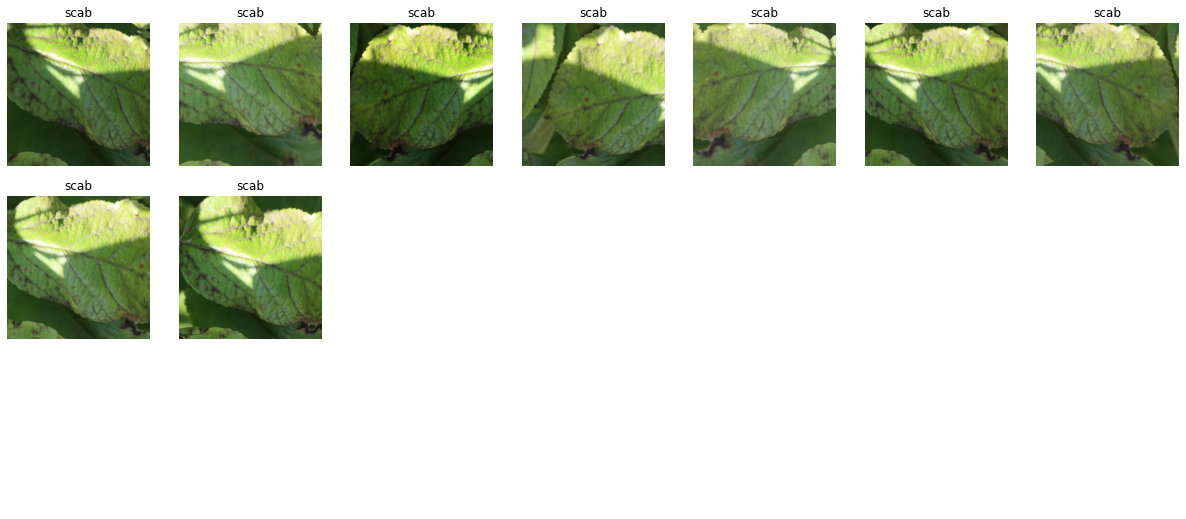

In [22]:
dls.show_batch(nrows=3, ncols=7,unique=True)

In [23]:
learner = cnn_learner(dls,resnet34, 
                      pretrained=True
                      ,metrics=[error_rate,accuracy]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [24]:
learner.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.573722,0.555765,0.151099,0.848901,01:38


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.587316,0.387586,0.090659,0.909341,02:00
1,0.380181,0.308747,0.082418,0.917582,01:38


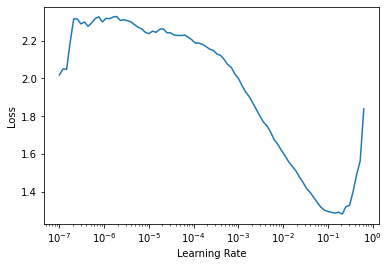

In [25]:
learner = cnn_learner(dls,resnet34, 
                      pretrained=True
                      ,metrics=[error_rate,accuracy]).to_fp16()
lr_min,lr_steep = learner.lr_find()

In [26]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 2.09e-02, steepest point: 5.25e-03


In [27]:
learner = cnn_learner(dls,resnet34, 
                      pretrained=True
                      ,metrics=[error_rate,accuracy]).to_fp16()
learner.fit_one_cycle(7,3e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.762700,0.549545,0.159341,0.840659,01:37
1,1.018812,0.470372,0.140110,0.859890,01:37
2,0.671615,0.310715,0.098901,0.901099,01:36
3,0.473260,0.280010,0.060440,0.939560,01:37
4,0.354447,0.287248,0.076923,0.923077,01:37
5,0.271241,0.292574,0.076923,0.923077,01:37
6,0.229717,0.295703,0.071429,0.928571,01:37


In [28]:
learner.unfreeze()

SuggestedLRs(lr_min=2.290867705596611e-05, lr_steep=1.0964781722577754e-06)

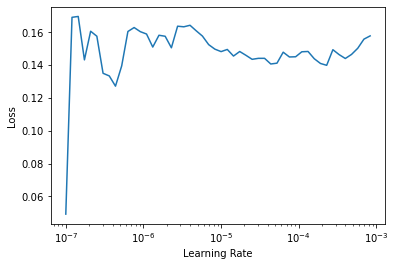

In [29]:
learner.lr_find()

In [30]:
learner = cnn_learner(dls,resnet34, 
                      pretrained=True
                      ,metrics=[error_rate,accuracy]).to_fp16()
learner.fit_one_cycle(3, 3e-3)
learner.unfreeze()
learner.fit_one_cycle(4, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.391426,0.643247,0.145604,0.854396,01:37
1,0.783911,0.443726,0.112637,0.887363,01:36
2,0.551338,0.418009,0.093407,0.906593,01:37


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.288408,0.394834,0.090659,0.909341,01:39
1,0.257298,0.380509,0.082418,0.917582,01:38
2,0.230289,0.383795,0.071429,0.928571,01:39
3,0.206778,0.373318,0.071429,0.928571,01:39


In [31]:
learner.export()

In [32]:
path.ls()

(#4) [Path('sample_submission.csv'),Path('images'),Path('test.csv'),Path('train.csv')]

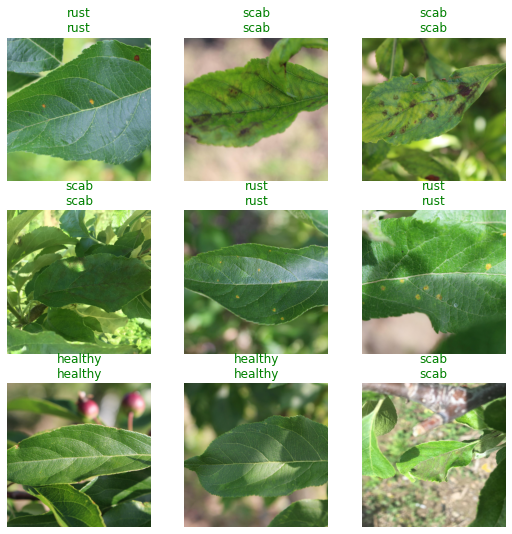

In [33]:
learner.show_results()

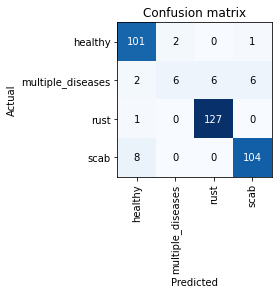

In [34]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(title='Confusion matrix')

In [35]:
fnames = get_image_files(path/'images')

In [36]:
test_df = pd.read_csv(r'../input/plant-pathology-2020-fgvc7/test.csv')
test_df['image_id'] = test_df['image_id'] + '.jpg'
test_df['image_id'].astype('str')

0          Test_0.jpg
1          Test_1.jpg
2          Test_2.jpg
3          Test_3.jpg
4          Test_4.jpg
            ...      
1816    Test_1816.jpg
1817    Test_1817.jpg
1818    Test_1818.jpg
1819    Test_1819.jpg
1820    Test_1820.jpg
Name: image_id, Length: 1821, dtype: object

In [37]:
tst_preds = []
tst_dl = dls.test_dl(test_df)
y, _ = learner.tta(dl=tst_dl)
tst_preds.append(y)

In [38]:
subm = pd.read_csv(path/"sample_submission.csv")

In [39]:
subm.iloc[:, 1:] = tst_preds[0]

In [40]:
subm.to_csv("submission3.csv", index=False)